In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import *


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FIREBLZE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


<AxesSubplot:xlabel='label', ylabel='count'>

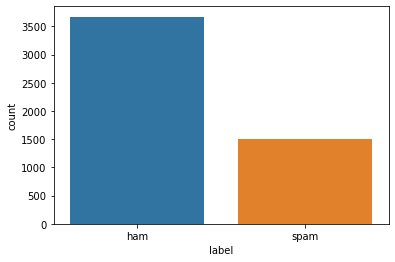

In [4]:
sns.countplot(x="label", data=data)

In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|subject:\S+|nbsp"

In [6]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))
data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,subject: enron methanol ; meter # : 988291 fol...,0
1,2349,ham,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,3624,ham,"subject: neon retreat ho ho ho , ' around wond...",0
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1
4,2030,ham,subject: : indian springs deal book teco pvr r...,0


In [7]:
data = data.drop(['Unnamed: 0', 'label'], axis=1)
data = data.rename(columns = {"label_num" : "Label"})
data

,text,Label
0,subject: enron methanol ; meter # : 988291 fol...,0
1,"subject: hpl nom january 9 , 2001 ( see attach...",0
2,"subject: neon retreat ho ho ho , ' around wond...",0
3,"subject: photoshop , windows , office . cheap ...",1
4,subject: : indian springs deal book teco pvr r...,0
...,...,...
5166,subject: put 10 ft transport volumes decreased...,0
5167,subject: 3 / 4 / 2000 following noms hpl ' tak...,0
5168,subject: calpine daily gas nomination > > juli...,0
5169,subject: industrial worksheets august 2000 act...,0


<AxesSubplot:xlabel='Label', ylabel='count'>

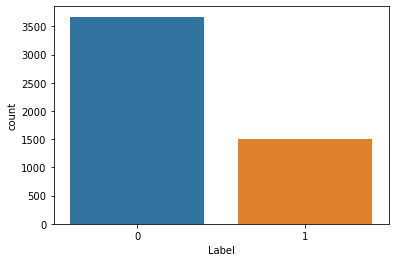

In [8]:
sns.countplot(x="Label", data=data)

In [9]:
x = data['text']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                         random_state=7)
print("Train Data size:", len(x_train))
print("Test Data size", len(x_test))

Train Data size: 3878
Test Data size 1293


In [10]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1000
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 43372


In [11]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = 50)
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = 50)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3878, 50)
Testing X Shape: (1293, 50)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
ann = Sequential()
ann.add(Dense(40, activation='relu'))
ann.add(Dense(45, activation='relu'))

# Adding dropout to prevent overfitting
ann.add(Dropout(0.1))
ann.add(Dense(1, activation='sigmoid'))

In [13]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann.fit(x_train, y_train,
                  batch_size=35,
                  epochs=100,
                  verbose=2
                  ,
                  validation_data=(x_test, y_test))

Epoch 1/100
111/111 - 0s - loss: 451.2732 - accuracy: 0.5879 - val_loss: 200.2878 - val_accuracy: 0.6265
Epoch 2/100
111/111 - 0s - loss: 212.1693 - accuracy: 0.6300 - val_loss: 158.2593 - val_accuracy: 0.6342
Epoch 3/100
111/111 - 0s - loss: 139.3723 - accuracy: 0.6434 - val_loss: 117.6402 - val_accuracy: 0.6342
Epoch 4/100
111/111 - 0s - loss: 94.3112 - accuracy: 0.6509 - val_loss: 100.1478 - val_accuracy: 0.6056
Epoch 5/100
111/111 - 0s - loss: 67.3314 - accuracy: 0.6697 - val_loss: 81.6274 - val_accuracy: 0.6381
Epoch 6/100
111/111 - 0s - loss: 49.7500 - accuracy: 0.6808 - val_loss: 76.0468 - val_accuracy: 0.6535
Epoch 7/100
111/111 - 0s - loss: 38.6013 - accuracy: 0.6831 - val_loss: 63.4061 - val_accuracy: 0.6589
Epoch 8/100
111/111 - 0s - loss: 29.4948 - accuracy: 0.6986 - val_loss: 57.5596 - val_accuracy: 0.6543
Epoch 9/100
111/111 - 0s - loss: 23.1282 - accuracy: 0.7107 - val_loss: 51.6768 - val_accuracy: 0.6845
Epoch 10/100
111/111 - 0s - loss: 18.0589 - accuracy: 0.7140 - val

Epoch 81/100
111/111 - 0s - loss: 0.4361 - accuracy: 0.8406 - val_loss: 6.9213 - val_accuracy: 0.7633
Epoch 82/100
111/111 - 0s - loss: 0.4514 - accuracy: 0.8350 - val_loss: 5.2339 - val_accuracy: 0.7726
Epoch 83/100
111/111 - 0s - loss: 0.4082 - accuracy: 0.8404 - val_loss: 5.4802 - val_accuracy: 0.7711
Epoch 84/100
111/111 - 0s - loss: 0.4449 - accuracy: 0.8360 - val_loss: 2.9932 - val_accuracy: 0.7718
Epoch 85/100
111/111 - 0s - loss: 0.4224 - accuracy: 0.8326 - val_loss: 3.1979 - val_accuracy: 0.7657
Epoch 86/100
111/111 - 0s - loss: 0.3785 - accuracy: 0.8409 - val_loss: 3.2954 - val_accuracy: 0.7773
Epoch 87/100
111/111 - 0s - loss: 0.3822 - accuracy: 0.8491 - val_loss: 2.9377 - val_accuracy: 0.7587
Epoch 88/100
111/111 - 0s - loss: 0.4197 - accuracy: 0.8476 - val_loss: 2.5619 - val_accuracy: 0.7711
Epoch 89/100
111/111 - 0s - loss: 0.4261 - accuracy: 0.8522 - val_loss: 2.6947 - val_accuracy: 0.7757
Epoch 90/100
111/111 - 0s - loss: 0.4005 - accuracy: 0.8381 - val_loss: 2.0990 - v

In [14]:
from ann_visualizer.visualize import ann_viz
ann_viz(ann, title="ANN Model")

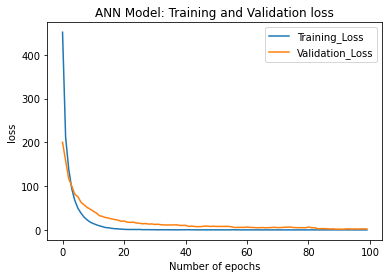

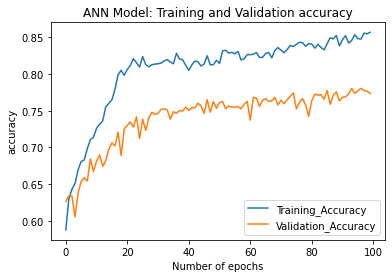

In [15]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('ANN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [16]:
trainPredict = ann.predict(x_train)
testPredict= ann.predict(x_test)

predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = ann.evaluate(x_train, y_train, verbose=0)
print("Our accuracy is %{}".format(trainScore[1]*100))

Our accuracy is %86.6941750049591


#### RNN

In [17]:
from keras.layers import SimpleRNN
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_dim=50 , return_sequences = True))
rnn.add(SimpleRNN(55, activation='relu' ,  return_sequences = False))
# Adding dropout to prevent overfitting
rnn.add(Dropout(0.1))
rnn.add(Dense(1, activation='sigmoid'))

In [18]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(x_train.shape)
print(y_test.shape)

(3878, 50)
(1293,)


In [19]:
x_train1 = x_train.reshape(3878,1,50)
y_train1 = np.array(y_train).reshape(3878,1,1)
x_test1 = x_test.reshape(1293,1,50)
y_test1 = np.array(y_test).reshape(1293,1,1)

In [20]:

history2 = rnn.fit(x_train1, y_train1,
                  batch_size=38,
                  epochs=220,
                  verbose=2,
                  validation_data=(x_test1, y_test1))

Epoch 1/220
103/103 - 0s - loss: 656.0249 - accuracy: 0.5686 - val_loss: 244.5258 - val_accuracy: 0.6234
Epoch 2/220
103/103 - 0s - loss: 259.5990 - accuracy: 0.6349 - val_loss: 190.2571 - val_accuracy: 0.6442
Epoch 3/220
103/103 - 0s - loss: 190.6392 - accuracy: 0.6542 - val_loss: 148.3149 - val_accuracy: 0.6388
Epoch 4/220
103/103 - 0s - loss: 126.3706 - accuracy: 0.6867 - val_loss: 120.1857 - val_accuracy: 0.6535
Epoch 5/220
103/103 - 0s - loss: 99.1559 - accuracy: 0.6854 - val_loss: 108.4850 - val_accuracy: 0.6388
Epoch 6/220
103/103 - 0s - loss: 79.2138 - accuracy: 0.6957 - val_loss: 99.8786 - val_accuracy: 0.6651
Epoch 7/220
103/103 - 0s - loss: 62.2160 - accuracy: 0.7187 - val_loss: 86.0561 - val_accuracy: 0.6342
Epoch 8/220
103/103 - 0s - loss: 53.3210 - accuracy: 0.7099 - val_loss: 79.3812 - val_accuracy: 0.6435
Epoch 9/220
103/103 - 0s - loss: 40.9727 - accuracy: 0.7380 - val_loss: 73.8570 - val_accuracy: 0.6504
Epoch 10/220
103/103 - 0s - loss: 36.3134 - accuracy: 0.7378 - v

Epoch 81/220
103/103 - 0s - loss: 0.3609 - accuracy: 0.8894 - val_loss: 8.3006 - val_accuracy: 0.7688
Epoch 82/220
103/103 - 0s - loss: 0.2997 - accuracy: 0.8920 - val_loss: 8.9726 - val_accuracy: 0.7649
Epoch 83/220
103/103 - 0s - loss: 0.4035 - accuracy: 0.8845 - val_loss: 7.3098 - val_accuracy: 0.7517
Epoch 84/220
103/103 - 0s - loss: 0.3970 - accuracy: 0.8657 - val_loss: 7.4743 - val_accuracy: 0.7649
Epoch 85/220
103/103 - 0s - loss: 0.3635 - accuracy: 0.8749 - val_loss: 8.2969 - val_accuracy: 0.7734
Epoch 86/220
103/103 - 0s - loss: 0.3972 - accuracy: 0.8865 - val_loss: 7.7692 - val_accuracy: 0.7657
Epoch 87/220
103/103 - 0s - loss: 0.3751 - accuracy: 0.8773 - val_loss: 5.6837 - val_accuracy: 0.7742
Epoch 88/220
103/103 - 0s - loss: 0.3297 - accuracy: 0.8783 - val_loss: 6.0784 - val_accuracy: 0.7703
Epoch 89/220
103/103 - 0s - loss: 0.2876 - accuracy: 0.8832 - val_loss: 6.9342 - val_accuracy: 0.7726
Epoch 90/220
103/103 - 0s - loss: 0.4742 - accuracy: 0.8765 - val_loss: 5.8546 - v

Epoch 161/220
103/103 - 0s - loss: 0.2742 - accuracy: 0.9079 - val_loss: 3.1588 - val_accuracy: 0.7788
Epoch 162/220
103/103 - 0s - loss: 0.2684 - accuracy: 0.9033 - val_loss: 2.8520 - val_accuracy: 0.7804
Epoch 163/220
103/103 - 0s - loss: 0.2418 - accuracy: 0.9097 - val_loss: 2.8250 - val_accuracy: 0.7804
Epoch 164/220
103/103 - 0s - loss: 0.2217 - accuracy: 0.9208 - val_loss: 3.5085 - val_accuracy: 0.7842
Epoch 165/220
103/103 - 0s - loss: 0.2440 - accuracy: 0.9139 - val_loss: 2.6762 - val_accuracy: 0.7819
Epoch 166/220
103/103 - 0s - loss: 0.2270 - accuracy: 0.9193 - val_loss: 3.3347 - val_accuracy: 0.7773
Epoch 167/220
103/103 - 0s - loss: 0.2038 - accuracy: 0.9281 - val_loss: 3.8219 - val_accuracy: 0.7734
Epoch 168/220
103/103 - 0s - loss: 0.2303 - accuracy: 0.9252 - val_loss: 2.8019 - val_accuracy: 0.7688
Epoch 169/220
103/103 - 0s - loss: 0.2251 - accuracy: 0.9203 - val_loss: 3.6966 - val_accuracy: 0.7804
Epoch 170/220
103/103 - 0s - loss: 0.2431 - accuracy: 0.9177 - val_loss: 

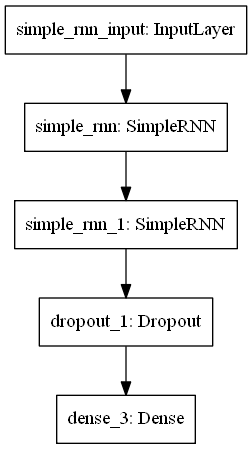

In [21]:
from keras.utils import plot_model,model_to_dot

plot_model(rnn, to_file='model_plot.png', show_layer_names=True)


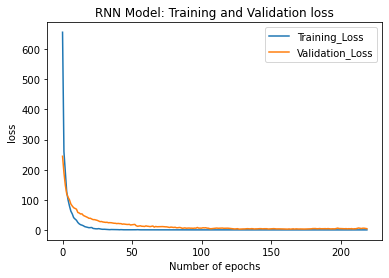

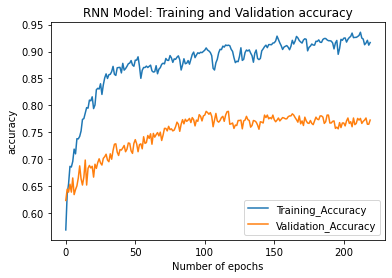

In [22]:
metrics_RNN = pd.DataFrame(history2.history)
# Rename column
metrics_RNN.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs2(var1, var2, string):
    metrics_RNN[[var1, var2]].plot()
    plt.title('RNN Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs2('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs2('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [23]:
trainPredict = rnn.predict(x_train1)
testPredict= rnn.predict(x_test1)

predicted=np.concatenate((trainPredict,testPredict),axis=0)
trainScore = rnn.evaluate(x_test1, y_test1, verbose=0)
print("Our accuracy is %{}".format(trainScore[1]*100))

Our accuracy is %77.26218104362488


### ROC AUC

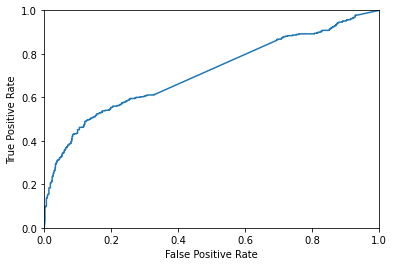

In [24]:
from sklearn.metrics import roc_curve
y_pred_keras = ann.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()
plot_roc_curve (fpr_keras,tpr_keras) 


Instructions for updating:
Please use `model.predict()` instead.


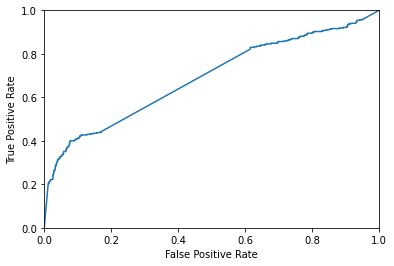

In [25]:
from sklearn.metrics import roc_curve
y_pred_rnn = rnn.predict_proba(x_test1)
fpr_rnn, tpr_rnn, thresholds_keras = roc_curve(y_test, y_pred_rnn)


plot_roc_curve (fpr_rnn,tpr_rnn) 

In [26]:
print(y_test1.shape)

(1293, 1, 1)


In [27]:
from sklearn.metrics import plot_confusion_matrix
yhat_probs = ann.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = ann.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test,yhat_classes)
print(matrix)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.773395
Precision: 0.739130
Recall: 0.321622
F1 score: 0.448211
Cohens kappa: 0.332358
ROC AUC: 0.709853
[[881  42]
 [251 119]]


<AxesSubplot:>

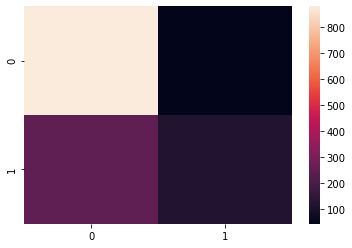

In [28]:
import seaborn as sns
sns.heatmap(matrix)

In [29]:
y_pred_rnn = rnn.predict(x_test1)
auc = roc_auc_score(y_test,y_pred_rnn )
print('ROC AUC: %f' % auc)

ROC AUC: 0.687312


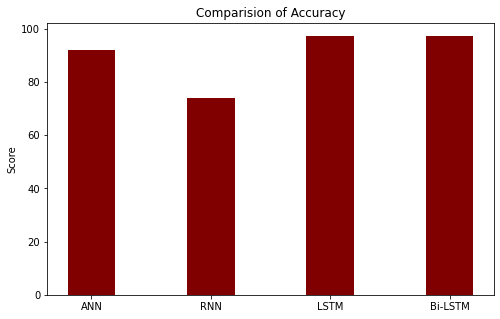

In [30]:
algo = ['ANN','RNN','LSTM','Bi-LSTM']
values = [91.98,74.16,97.29,97.37]
fig = plt.figure(figsize = (8,5))
 
# creating the bar plot
plt.bar(algo, values, color ='maroon',
        width = 0.4)


plt.ylabel("Score")
plt.title("Comparision of Accuracy")
plt.show()

In [40]:
from sklearn.metrics import precision_recall_curve
y_pred=ann.predict_proba(x_test)
p = precision_recall_curve(y_test,y_pred)

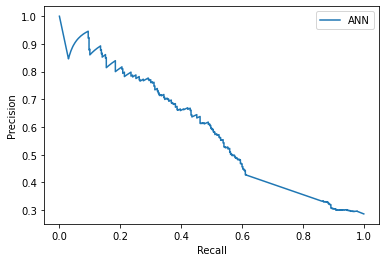

In [47]:
plt.plot(p[1], p[0], label='ANN')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [50]:
auc_score = auc(p[1], p[0])

TypeError: 'numpy.float64' object is not callable

In [53]:
from sklearn.metrics import precision_recall_curve
y_pred=ann.predict_proba(x_test)
q = precision_recall_curve(y_test,testPredict)